In [1]:
import numpy as np
import matplotlib.cm as cm
from matplotlib import ticker
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import dask
from sklearn.neighbors import KDTree
import netCDF4
from metpy import calc
from metpy.units import units

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from IPython.display import HTML
from matplotlib import animation
from matplotlib.gridspec import GridSpec

In [2]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [3]:
others = netCDF4.Dataset("/fast/gmooers/Raw_Data/extras/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-00000.nc")
levs = np.array(others.variables['lev'])
lons = np.array(others.variables['lon'])
new = np.flip(levs)
crms = np.arange(1,129,1)
Xs, Zs = np.meshgrid(crms, new)

### Changes paths for
- 3D Latent Space
- Test Dataset (W Variable)

In [4]:
z_test_tsne_track = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/latent_space/3D_PCA_Latent_Space__31.npy")

Test_Images = np.load("/fast/gmooers/Preprocessed_Data/W_Variable/Trackable_Space_Time_W_Test.npy")
Max_Scalar = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Max_Scalar.npy")
Min_Scalar = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Min_Scalar.npy")

Test_Images = np.interp(Test_Images, (0, 1), (Min_Scalar, Max_Scalar))

In [6]:
path_to_file = '/DFS-L/DATA/pritchard/gmooers/Raw_Data_Storage/MAPS/SPCAM/100_Days/New_SPCAM5/archive/TimestepOutput_Neuralnet_SPCAM_216/atm/hist/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-00000.nc'
extra_variables = xr.open_dataset(path_to_file)
latitudes = np.squeeze(extra_variables.LAT_20s_to_20n.values)
longitudes = np.squeeze(extra_variables.LON_0e_to_360e.values)
ha = extra_variables.hyai.values
hb = extra_variables.hybi.values
PS = 1e5
Pressures_real = PS*ha+PS*hb

### Either by Inspection of Dendrogram pick the optimal number of labels and link to that .npy file in the "Clouds/Compressed_Data" directory

In [7]:
cloud_labels = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Mooers_Logbook/Fully_Convolutional_W/Clouds/3D/Compressed_Data/Z_Agglomerative_6.npy")

### This is an example for 6 labels (would need to add/take away lines of code if not 6)

In [8]:
Test_Images_1 = Test_Images[cloud_labels ==0,:,:]
Test_Images_2 = Test_Images[cloud_labels ==1,:,:]
Test_Images_3 = Test_Images[cloud_labels ==2,:,:]
Test_Images_4 = Test_Images[cloud_labels ==3,:,:]
Test_Images_5 = Test_Images[cloud_labels ==4,:,:]
Test_Images_6 = Test_Images[cloud_labels ==5,:,:]

v_prof_1 = np.nanmean(np.std(Test_Images_1, axis = 0),axis=1)
v_prof_2 = np.nanmean(np.std(Test_Images_2, axis = 0),axis=1)
v_prof_3 = np.nanmean(np.std(Test_Images_3, axis = 0),axis=1)
v_prof_4 = np.nanmean(np.std(Test_Images_4, axis = 0),axis=1)
v_prof_5 = np.nanmean(np.std(Test_Images_5, axis = 0),axis=1)
v_prof_6 = np.nanmean(np.std(Test_Images_6, axis = 0),axis=1)

### Similar to the other 3D plots/animations, but you will have to manually label the cloud/convection types after looking at them (can't be automated unfortunately)
- may want to remove the bounds ax limits or adjust for your latent space

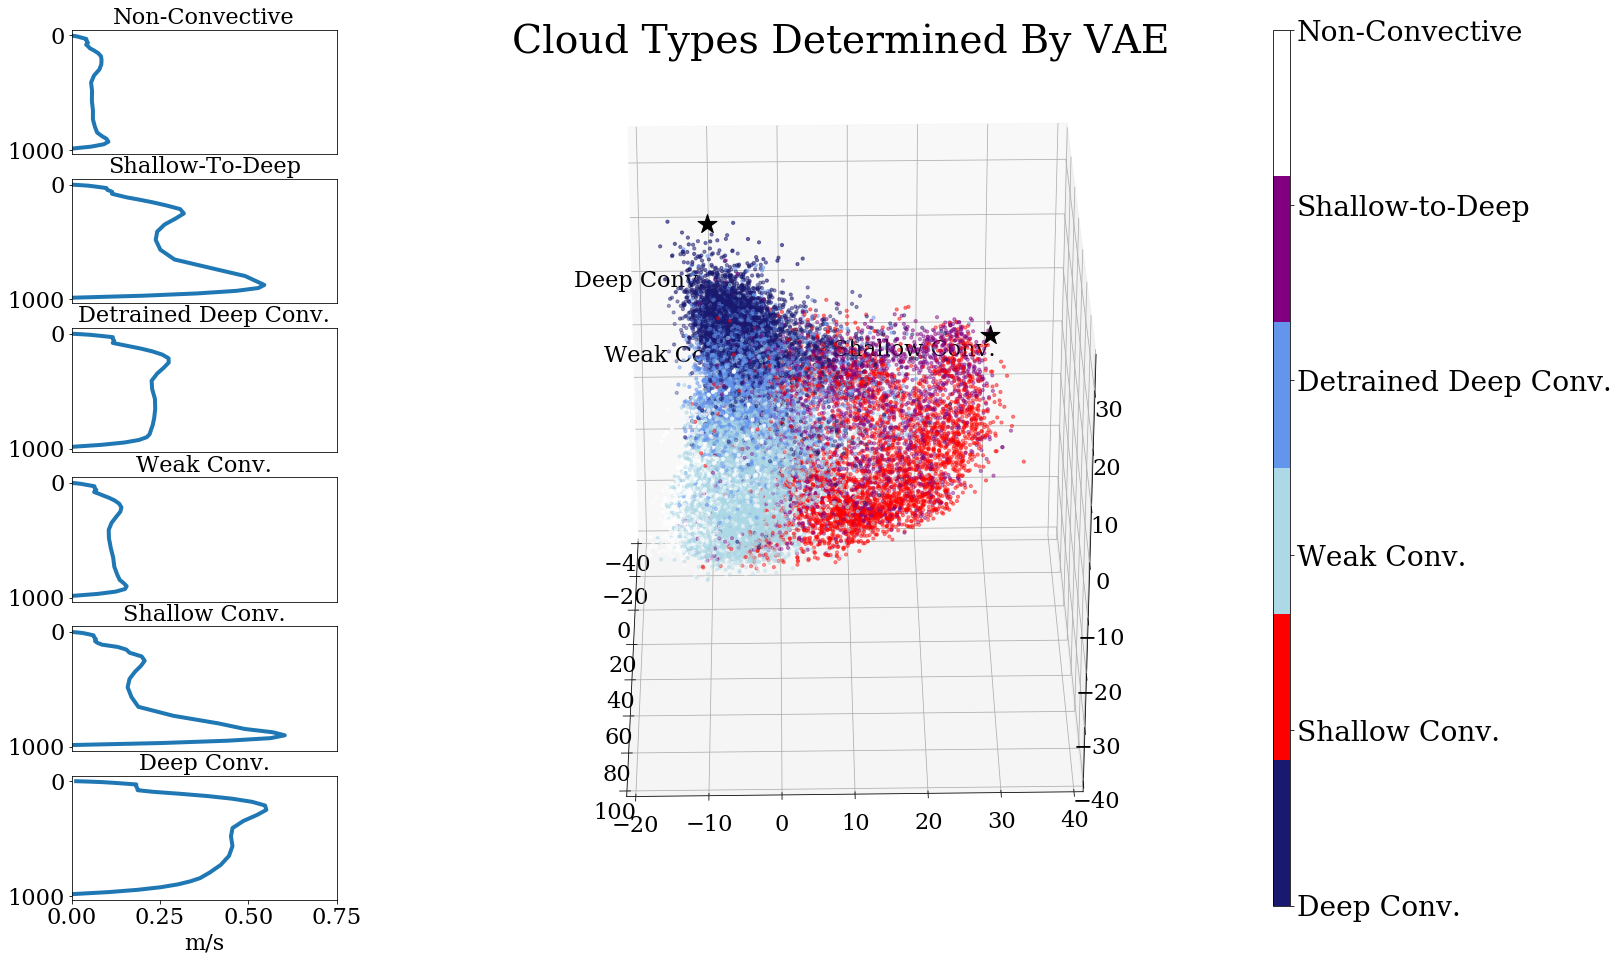

In [15]:
fig, ax = plt.subplots(6,2,figsize=(24,16))
gs=GridSpec(6,2, width_ratios=[1, 3])

ax1=fig.add_subplot(gs[0,0])
cs = ax1.plot(np.flipud(v_prof_6), Pressures_real[:-1]/100.0)
ax1.set_xlim(0,0.75)
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_xticks([])
ax1.set_title("Non-Convective", fontsize = fz)

ax2=fig.add_subplot(gs[1,0])
cs = ax2.plot(np.flipud(v_prof_5), Pressures_real[:-1]/100.0)
ax2.set_xlim(0,0.75)
ax2.set_ylim(ax2.get_ylim()[::-1])
ax2.set_xticks([])
ax2.set_title("Shallow-To-Deep", fontsize = fz)

ax3=fig.add_subplot(gs[2,0])
cs = ax3.plot(np.flipud(v_prof_4), Pressures_real[:-1]/100.0)
ax3.set_xlim(0,0.75)
ax3.set_ylim(ax3.get_ylim()[::-1])
ax3.set_xticks([])
ax3.set_title("Detrained Deep Conv.", fontsize = fz)

ax4=fig.add_subplot(gs[3,0]) 
cs = ax4.plot(np.flipud(v_prof_3), Pressures_real[:-1]/100.0)
ax4.set_xlim(0,0.75)
ax4.set_ylim(ax4.get_ylim()[::-1])
ax4.set_xticks([])
ax4.set_title("Weak Conv.", fontsize = fz)

ax5=fig.add_subplot(gs[4,0])
cs = ax5.plot(np.flipud(v_prof_2), Pressures_real[:-1]/100.0)
ax5.set_xlim(0,0.75)
ax5.set_ylim(ax5.get_ylim()[::-1])
ax5.set_xticks([])
ax5.set_title("Shallow Conv.", fontsize = fz)

ax6=fig.add_subplot(gs[5,0])
cs = ax6.plot(np.flipud(v_prof_1), Pressures_real[:-1]/100.0)
ax6.set_xlim(0,0.75)
ax6.set_ylim(ax6.get_ylim()[::-1])
ax6.set_xlabel('m/s')
ax6.set_title("Deep Conv.", fontsize = fz)


ax7=fig.add_subplot(gs[:,1], projection='3d')

#cmap = matplotlib.colors.ListedColormap(["white", "purple", "cornflowerblue", "lightblue", "red", "midnightblue"])
cmap = matplotlib.colors.ListedColormap(["midnightblue", "red", "lightblue","cornflowerblue","purple", "white"])
norm = matplotlib.colors.BoundaryNorm(np.arange(1,6), cmap.N)

cp = ax7.scatter(xs=z_test_tsne_track[:, 0], ys=z_test_tsne_track[:, 1], zs=z_test_tsne_track[:, 2], c=cloud_labels, cmap=cmap, s=10.0)
ax7.set_title("Cloud Types Determined By VAE", fontsize = fz*1.75, y = 1.05)

ax7.set_ylim(-20,40)
ax7.set_xlim(-40,100)
ax7.set_zlim(-40,35)

ax7.scatter(xs=100,ys=-5,zs=35,c="black",s=400.0,marker="*")
ax7.text(100,-5,35,'Weak Conv.',horizontalalignment='right')

ax7.scatter(xs=-10,ys=30,zs=7,c="black",s=400.0,marker="*")
ax7.text(30,30,15,'Shallow Conv.',horizontalalignment='right')

ax7.scatter(xs=-20,ys=-10,zs=25,c="black",s=400.0,marker="*")
ax7.text(20,-10,25,'Deep Conv.',horizontalalignment='right')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.12, 0.01, 0.76])
cbar = fig.colorbar(cp, cax=cbar_ax)
#cbar.set_label(label="Cloud Type", fontsize=fz*0.5, labelpad=30, y = 0.55)
cbar.ax.set_yticklabels(["Deep Conv.","Shallow Conv.", "Weak Conv.","Detrained Deep Conv.","Shallow-to-Deep","Non-Convective"], fontsize=fz*1.25)


fig.delaxes(ax[0,1])
fig.delaxes(ax[1,1])
fig.delaxes(ax[2,1])
fig.delaxes(ax[3,1])
fig.delaxes(ax[4,1])
fig.delaxes(ax[5,1])

fig.delaxes(ax[0,0])
fig.delaxes(ax[1,0])
fig.delaxes(ax[2,0])
fig.delaxes(ax[3,0])
fig.delaxes(ax[4,0])
fig.delaxes(ax[5,0])

for ii in range(360):
    ax7.view_init(elev=30, azim=ii)
    if ii < 10:
        plt.savefig("Png_Storage/Improved_VAE_Clusters_31/00"+str(ii)+".png")
    if ii >= 10 and ii < 100:
        plt.savefig("Png_Storage/Improved_VAE_Clusters_31/0"+str(ii)+".png")
    if ii >= 100:
        plt.savefig("Png_Storage/Improved_VAE_Clusters_31/"+str(ii)+".png")
print(" ")